# Fetching data from remote sites

- [COVID-19 Dashboard by JHU](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
- [Taiwan CDC Dashboard](https://sites.google.com/cdc.gov.tw/2019ncov/taiwan)

## Import depencies and libaries

In [ ]:
try:
    from google.colab import drive, files
    in_colab = True
except ModuleNotFoundError:
    in_colab = False

if in_colab:
    home_dir = ''
    drive.mount('/content/drive')
    groot_dir = '/content/drive/My Drive/adventures/'
else:
    from pathlib import Path
    home_dir = str(Path.home())
    groot_dir = home_dir + '/Google Drive/adventures/'

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=14)
mpl.rc('ytick', labelsize=14)

from datetime import datetime
from dateutil.relativedelta import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math
import os
import sys
import gdown
import requests
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from pandas.plotting import register_matplotlib_converters

figure_dir = groot_dir + 'figure/'
covid_dir = groot_dir + 'covid19/'
dataroot_dir = groot_dir

gfigure = lambda name: figure_dir + name + '.png'

output_fig = lambda name: plt.savefig( gfigure(name), dpi = 300)

local_time = lambda x, offset: x + relativedelta(hours= offset)

def local_now(hours = 8):
    return datetime.now() + relativedelta(hours = hours if in_colab else 0)

def print_now():
    return print(local_now())

def DropboxLink(did, fname):
    return 'https://dl.dropboxusercontent.com/s/%s/%s' % \
    (did, fname)
    
def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)

def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath

TAIWAN_CSV = '1I5yqulrZSHPSQkxT3oqt_3uVAhPolOEP'
JHU_CSSE = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/'
TITANIC_TRAIN = '1PrxmUKRQWSlYgtMU13l1E0ob4hVJI20O'
MNIST_TRAIN = '1E-uJ0zqqAfpsVjoOSzqF5TXhDfPNlkQ5'
MNIST_TRAIN_LABEL = '13clNJ2cd2I90W3DEkDBKjZSDNNEqqx3B'
MNIST_TEST = '1zVpVHJl5YABa3qExt1K-O3WaEHXTJekg'
MNIST_TEST_LABEL = '1qci_-dqubnRN-cdrCsbYaUAxyO7_jH9z'

print('ML project #1 - how to fetch date from remote site')
print('\nRunning on %s' % sys.platform)
print('Python Version', sys.version)
print('\nData storage points to ==>', groot_dir)
 
print('\nLibraries and dependenciess imported')
print_now()

Mounted at /content/drive
ML project #1 - how to fetch date from remote site

Running on linux
Python Version 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]

Data storage points to ==> /content/drive/My Drive/adventures/

Libraries and dependenciess imported
2021-02-18 19:22:09.611590


## helpers for fetching remote files

In [ ]:
import gdown, requests

def fetch_gdrive_file(fid, local_save):
    remote_url = 'https://drive.google.com/uc?id=' + fid
    gdown.download(remote_url, local_save, quiet = False)


def fetch_file_via_requests(url, save_in_dir):
    local_filename = url.split('/')[-1]
    # NOTE the stream=True parameter below
    output_fpath = save_in_dir + local_filename
    with requests.get(url, stream=True) as r:
        r.raise_for_status()
        with open(output_fpath, 'wb') as f:
            for chunk in r.iter_content(chunk_size=8192): 
                if chunk: # filter out keep-alive new chunks
                    f.write(chunk)
                    # f.flush()
    return output_fpath
print('helpers imported')
print_now()   

helpers imported
2021-02-06 12:33:57.815491


# ① Fetch files by gdown or requests 

## 1.1 - Download JHU CSSE data files (下載 JHU 每日更新資料)

- [Coronavirus COVID-19 Global Cases by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University (JHU)](https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6)
- [Data on Github](https://bit.ly/2Alrmgp)

In [ ]:
# shorten_jhu_github = https://bit.ly/2Alrmgp

github = JHU_CSSE

csv_holder = 'time_series_covid19_%s_global.csv'

csvlist = ['confirmed', 'deaths', 'recovered']

jhudata = lambda x: csv_holder % x

put_data_here = os.path.join(groot_dir, 'covid19') + '/'

print('defintion loaded')
print_now()

defintion loaded
2021-02-18 19:22:15.067209


In [ ]:
for dfile in csvlist:
  url = github + jhudata(dfile)
  dled = fetch_file_via_requests(url, put_data_here)
  localname = dled.split("/")[-1]
  print(f"{localname:s} fetched")

print("\nall file fetched")
print_now()

time_series_covid19_confirmed_global.csv fetched
time_series_covid19_deaths_global.csv fetched
time_series_covid19_recovered_global.csv fetched

all file fetched
2021-02-18 19:22:23.504415


## 1.2 - Take a look at the downloaded files

In [ ]:
peek = os.path.join(covid_dir, jhudata("confirmed"))
peek_d = os.path.join(covid_dir, jhudata("deaths"))
peek_r = os.path.join(covid_dir, jhudata("recovered"))

df = pd.read_csv(peek)
deaths = pd.read_csv(peek_d)
recovered = pd.read_csv(peek_r)

print("load csv into dataframe done")
print_now()

load csv into dataframe done
2021-02-18 19:22:50.141499


In [ ]:
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,53400,53489,53538,53584,53584,53775,53831,53938,53984,54062,54141,54278,54403,54483,54559,54595,54672,54750,54854,54891,54939,55008,55023,55059,55121,55174,55231,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,63033,63595,63971,64627,65334,65994,66635,67216,67690,67982,68568,69238,69916,70655,71441,72274,72812,73691,74567,75454,76350,77251,78127,78992,79934,80941,81993,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,101913,102144,102369,102641,102860,103127,103381,103611,103833,104092,104341,104606,104852,105124,105369,105596,105854,106097,106359,106610,106887,107122,107339,107578,107841,108116,108381,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8586,8586,8586,8682,8818,8868,8946,9038,9083,9083,9194,9308,9379,9416,9499,9549,9596,9638,9716,9779,9837,9885,9937,9972,10017,10070,10137,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18156,18193,18254,18343,18425,18613,18679,18765,18875,18926,19011,19093,19177,19269,19367,19399,19476,19553,19580,19672,19723,19782,19796,19829,19900,19937,19996,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1513,1514,1515,1520,1521,1531,1536,1537,1537,1539,1540,1544,1546,1548,1548,1548,1549,1551,1553,1651,1657,1767,1817,1850,1882,1948,1957,1976,1985,2001,2050,2064,2091,2140,2142,2195,2228,2269,2311,2329
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,146701,147400,148171,148968,149769,150505,151142,151569,152031,152555,153093,153590,154063,154557,155006,155414,155884,156393,156996,157593,158168,158559,158962,159443,159956,160426,161087,161559,162029,162601,163213,163975,164736,165535,166200,166800,167604,168444,169487,170527
270,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2104,2104,2105,2107,2109,2110,2111,2112,2112,2113,2115,2115,2115,2118,2118,2118,2118,2119,2120,2120,2120,2120,2121,2122,2122,2122,2122,2124,2127,2127,2131,2131,2133,2134,2136,2136,2145,2145,2148,2151
271,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26567,27728,28596,29757,31100,32800,34278,36074,37605,38207,39515,40949,42213,43333,44592,45337,46146,47622,4891

In [ ]:
df[df["Country/Region"].str.contains("Taiwan")]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
240,NaN,Taiwan*,23.7,121.0,1,1,3,3,4,5,8,8,9,10,10,10,10,11,11,16,16,17,18,18,18,18,18,18,18,20,22,22,23,24,26,26,28,30,31,32,...,828,828,834,838,842,842,843,851,855,862,868,870,881,881,884,889,889,890,893,895,899,909,911,912,915,917,919,923,924,927,928,933,935,936,937,937,937,937,937,938


In [ ]:
df.loc[df["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"
deaths.loc[deaths["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"
recovered.loc[recovered["Country/Region"] == "Taiwan*", "Country/Region"] = "Taiwan"

In [ ]:
recovered[recovered["Country/Region"].str.contains("Taiwan")]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
225,NaN,Taiwan,23.7,121.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,5,5,5,...,720,720,726,730,731,731,741,751,755,756,766,769,777,777,783,787,787,797,803,809,813,823,830,830,832,834,839,841,843,844,848,850,853,859,859,859,859,859,859,879


## 1.3 - Select required contents from JHU data

### 1.3.1 Worldwide statistics

In [ ]:
world = df.iloc[:, 4:].sum()
world.plot.line()

### 1.3.2 How to select required rows

In [ ]:
df[df["Country/Region"] == "Taiwan"].iloc[:, 4:]

In [ ]:
selected_rows = lambda c, d: d[d["Country/Region"] == c].iloc[:, 4:].sum()

def country_rows(c):
  return selected_rows(c, df)

def active_data(c):
  i = selected_rows(c, df)
  d = selected_rows(c, deaths)
  r = selected_rows(c, recovered)
  return i - d - r 

def country_df(c):
  d = pd.DataFrame(data=country_rows(c), columns=[c])
  d["Active"] = active_data(c)
  d.reset_index(drop=True, inplace=True)
  d.set_index(pd.DatetimeIndex(df.columns[4:]), inplace=True)
  return d

## 1.4 - Investigate Data

In [ ]:
def in_list(c):
    return c in list(df["Country/Region"])
in_list("Brazil")
in_list("xyz")

In [ ]:
world = df.iloc[:, 4:].sum()
wdf = pd.DataFrame(data=world, columns=["Worldwide"])
fig, ax = plt.subplots(figsize=(12, 8))
wdf.plot.line(ax=ax)
ax.legend(loc="upper left", frameon=True, shadow=True, fontsize=14)
ax.grid(b="on", which="major", ls="--", color="#aaaaaa")

In [ ]:
watch_list = ["Korea, South", "Taiwan", "Japan"]

### 1.4.1 pandas plot

In [ ]:
wdf = pd.DataFrame()
for x in watch_list:
    wdf[x] = country_rows(x) 
wdf.set_index(pd.DatetimeIndex(df.columns[4:]), inplace=True)

fig, ax = plt.subplots(figsize=(12, 8))
wdf.plot.line(ax=ax)
ax.legend(loc="upper left", frameon=True, shadow=True, fontsize=14)
ax.grid(b="on", which="major", ls="--", color="#aaaaaa")

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(data=wdf)
ax.legend(loc="upper left", frameon=True, shadow=True, fontsize=14)
ax.grid(b="on", which="major", ls="--", color="#aaaaaa")

### 1.4.2 matplotlib pyplot

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for x in watch_list:
    ax.plot(country_rows(x), label=x)

xlbs_total = df.columns[4:]
xlbs = [xlbs_total[i] for i in range(0, len(xlbs_total), 28)]
xlocs = range(0, len(xlbs_total), 28)
ax.set_xticks(xlocs)
ax.set_xticklabels(xlbs)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
for x in watch_list:
    ax.plot(wdf[x], label=x)

## 1.5 - Plot Practice: Active Trend

- [seaborn set_style](https://seaborn.pydata.org/generated/seaborn.set_style.html)
- [Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)
- [sns.reset_defaults()](https://seaborn.pydata.org/generated/seaborn.reset_defaults.html?highlight=reset#seaborn.reset_defaults) 

### 1.5.1 pandas.plot.line() 

In [ ]:
zdf = country_df("Taiwan")
zdf.plot.line()

In [ ]:
def active_trend(to_watch):
    fig, ax = plt.subplots(figsize=(12, 8))
    bdf = country_df(to_watch)
    bdf.plot.line(ax=ax)
    ax.fill_between(bdf.index, bdf.Active, color="lightblue", alpha=0.1) #底線下填滿顏色
    ax.bar(bdf.index, bdf[to_watch].diff(1), color="purple", alpha=0.5) #Bar圖:每天新增病例
    ax.legend(loc="best", frameon=True, shadow=True, fontsize=14)
    ax.grid(b="on", which="major", ls="--", color="#aaaaaa")

    # 製造另一個軸
    # ax_2 = ax.twinx()
    # ylim = ax.get_ylim()
    # ax_2.set_ylim(y_lim)

active_trend("Taiwan")

### 1.5.2 seaborn

In [ ]:
def sns_active_trend(to_watch):
    
    bdf = country_df(to_watch)
    
    f = plt.figure(figsize=(12, 8))
    gs = f.add_gridspec(1, 1)

    with sns.axes_style("darkgrid"):
        ax = f.add_subplot(gs[0, 0])
        ax = sns.lineplot(data=bdf)


    ax.fill_between(bdf.index, bdf.Active, color="lightblue", alpha=0.1) #底線下填滿顏色
    ax.bar(bdf.index, bdf[to_watch].diff(1), color="purple", alpha=0.5) #Bar圖:每天新增病例
    ax.legend(loc="best", frameon=True, shadow=True, fontsize=14)
    #ax.grid(b="on", which="major", ls="--", color="#aaaaaa")

sns_active_trend("Taiwan")

## 1.6 New Case Trend

In [ ]:
to_watch = "US"
ndf = country_df(to_watch)
new_confirmed = ndf[to_watch].diff(1)
new_confirmed

In [ ]:
def new_case_trend(to_watch, w_size=7):
    ndf = country_df(to_watch)

    #每日新增確診數
    daily_confirmed = ndf[to_watch].diff(1)

    #七日平均
    window_size = w_size
    avg7 = ndf[to_watch].diff(1).rolling(window_size).mean() #時間序列:每七天取一次平均，每次移動一天

    fig, ax = plt.subplots(figsize=(14, 10))
    ax.bar(ndf.index[:-window_size], daily_confirmed[:-window_size], color="lightblue", alpha=0.6)
    ax.bar(ndf.index[-window_size:], daily_confirmed[-window_size:], color="navy", alpha=0.6)
    ax.plot(ndf.index, avg7, ls="--", color="brown")
    ax.grid(b="on", which="major", color="#aaaaaa")

new_case_trend("Singapore", 14)

## ② Manual Works

## 2.1 - Taiwan.csv

- [疫情數據全報導](https://udn.com/news/COVID19)：此報導會每日更新網頁內容
- [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

**補充說明：**

根據 2020-08-01 衛生福利部疾病管制署記者會公佈資料：

> 指揮中心統計，國內截至目前累計81,826例(含80,728例排除)，其中474例確診，分別為382例境外移入，55例本土病例、36例敦睦艦隊及1例待釐清。

因此 taiwan.csv 需資料增加一個欄位 tbd (to_be_decided)，新的版本更名為 taiwan_aug.csv，以下使用的範例資料檔案，為更名前的最後一個檔案，因此資料到 2020-07-31 為止。

In [ ]:
# 下載最後一個舊版 taiwan.csv 

fetch_file_via_requests(
    DropboxLink('upr5klwy07bba3h', 'taiwan.csv'), covid_dir
)

'/content/drive/My Drive/adventures/covid19/taiwan.csv'

In [ ]:
csv_path = os.path.join(covid_dir, 'taiwan.csv')
csv_path

'/content/drive/My Drive/adventures/covid19/taiwan.csv'

In [ ]:
tdf = pd.read_csv(csv_path, parse_dates=["date"], index_col=["date"])
tdf["Active"] = tdf.Taiwan - tdf.Deaths - tdf.Recovered
tdf.tail()

,Taiwan,Local,Imported,Deaths,Recovered,Panshi,Active
date,,,,,,,
2020-07-27,462,55,371,7,440,36,15
2020-07-28,467,55,376,7,440,36,20
2020-07-29,467,55,376,7,440,36,20
2020-07-30,467,55,376,7,440,36,20
2020-07-31,467,55,376,7,440,36,20


## 2.2 Trending Chart

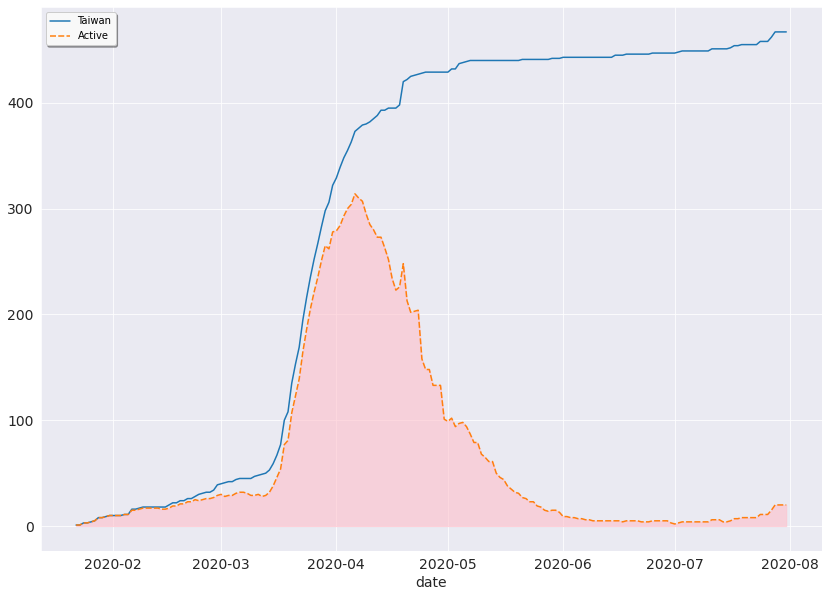

In [ ]:
#  tdf.Taiwan - tdf.Deaths - tdf.Recovered
# 'Active Case = Accumulated Infection - Deaths - Recovered'

f = plt.figure(figsize=(14, 10))
gs = f.add_gridspec(1, 1)
adf = tdf[["Taiwan", "Active"]].copy()

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    ax = sns.lineplot(data=adf)
ax.fill_between(adf.index, adf.Active, color="pink", alpha=0.6)
ax.legend(loc="upper left", frameon=True, shadow=True, facecolor="#f8f8f8")

## 2.3 - Daily Cases

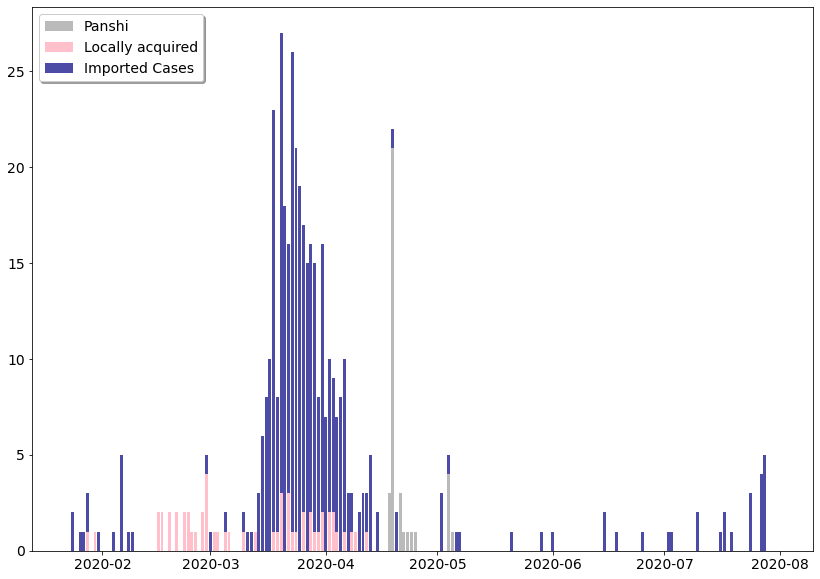

In [ ]:
zdf = pd.DataFrame()
zdf["Taiwan"] = tdf.Taiwan.diff(1)
zdf["Local"] = tdf.Local.diff(1)
zdf["Imported"] = tdf.Imported.diff(1)
zdf["Panshi"] = tdf.Panshi.diff(1)

zdf.drop(zdf.index[0], axis=0, inplace=True)

fig, ax = plt.subplots(figsize=(14, 10))
ax.bar(zdf.index, zdf.Panshi, color="darkgray", alpha=0.8, label="Panshi")
ax.bar(zdf.index, zdf.Local, color="pink", bottom=zdf.Panshi, label="Locally acquired")
ax.bar(zdf.index, zdf.Imported, color="navy", alpha=0.7, bottom=zdf.Panshi+zdf.Local, label="Imported Cases")
ax.legend(loc="upper left", frameon=True, shadow=True, fontsize=14)

## 2.4 - Complicated tw_newcase()

In [ ]:
def tw_newcase():

    dsource = u'Data Source: Taiwan CDC, UDN & PTT'
    durl = 'https://bit.ly/3dj7zgg, https://bit.ly/33AQlGr & https://reurl.cc/xZgqA5'

    ddate = '[ %s ~ %s ]' %  \
        (str(tdf.index[0]).split(' ')[0] , str(tdf.index[-1]).split(' ')[0])    
    to_watch = 'Taiwan'
    window_size = 1
    
    new_confirmed = tdf[to_watch].diff(1)
    r7 = tdf[to_watch].diff(1).rolling(7).mean()

    fig, ax = plt.subplots(figsize = (18, 12))

    ax.bar(tdf.index[window_size:-7], tdf.Local.diff(1)[window_size:-7], 
        label = 'Daily new "Locally-acquired" before %s' % str(tdf.index[-8]).split(' ')[0], 
        color = 'teal' , alpha = 0.2)
    
    ax.bar(tdf.index[window_size:-7], tdf.Panshi.diff(1)[window_size:-7], 
        label = 'Daily new "Panshi" before %s' % str(tdf.index[-8]).split(' ')[0], 
        bottom = tdf.Local.diff(1)[window_size:-7],
        color = 'darkgray' , alpha = 0.6)   
    
    ax.bar(tdf.index[window_size:-7], tdf.Imported.diff(1)[window_size:-7], 
        bottom = tdf.Local.diff(1)[window_size:-7] + tdf.Panshi.diff(1)[window_size:-7], 
        label = 'Daily new "Imported" before %s' % str(tdf.index[-8]).split(' ')[0], 
        alpha = 0.3, color = 'orange')
    
    ax.bar(tdf.index[-7:], tdf.Local.diff(1)[-7:],  
        label = 'Locally-acquired in the last 7 days: %d' % \
        ( tdf.Local[-1] - tdf.Local[-8]),
        color = 'navy' , alpha = 0.25)
    
    ax.bar(tdf.index[-7:], tdf.Panshi.diff(1)[-7:],  
        label = 'Panshi in the last 7 days: %d' % \
        ( tdf.Panshi[-1] - tdf.Panshi[-8]),
        bottom = tdf.Local.diff(1)[-7:],
        color = 'black' , alpha = 0.7)
    
    ax.bar(tdf.index[-7:], tdf.Imported.diff(1)[-7:], 
        label = 'Imported in the last 7 days: %d' % \
        ( tdf.Imported[-1] - tdf.Imported[-8]),
        bottom = tdf.Local.diff(1)[-7:] + tdf.Panshi.diff(1)[-7:], alpha = 0.5, color = 'darkorange')

    ax.plot(r7, color = 'brown', lw = 2, ls = '--', label = '7-days average')
    ax.axvline(x = tdf.index[-8], ls = '-.', color = 'brown', alpha = 0.5)
    # ax.plot(tdf.Taiwan.diff(1)[window_size:], color = 'blue', alpha = 0.75)

    ax.legend( loc = 'upper left', frameon = True, shadow = True, 
        facecolor = '#f8f8f6', 
        edgecolor = 'darkblue',
        title = '{:^50}\n{:^70}\n'.format(dsource, ddate), title_fontsize = 14,
        # title = '{:^60}\n{:^60}\n{:^90}\n'.format(dsource, durl, ddate), title_fontsize = 13,
        fontsize = 13)
    ax.grid (b = 'on', which = 'major', alpha = 0.25, ls = '--')
    xticks_locataion = [tdf.index[x] for x in range(2, len(tdf.index), 28)]
    xticks_labels = [str(tdf.index[i].date()) for i in range(5, len(tdf.index), 28)]
    ax.set_xticks(xticks_locataion)
    ax.set_xticklabels(xticks_labels)    
    ax2 = ax.twinx()
    ylim = ax.get_ylim()  
    ax2.set_ylim(ylim)
    ax2.text(tdf.index[-2], tdf.Taiwan.diff(1)[-1]+5, '%s:\n Local %d , Imported %d' % 
        ((str(tdf.index[-1]).split(' ')[0]), tdf.Local.diff(1)[-1], tdf.Imported.diff(1)[-1]),
        fontsize = 16, ha = 'right')
    
tw_newcase()